In [3]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
from cartopy import crs as ccrs
import pandas as pd
import dask 
import netCDF4

In [4]:
# Gonna do the concentration data for RGL first 

with xr.open_dataset(r'C:\Users\wilse\Documents\Final_project\RGL-ceda-20231103.nc') as f:
    rgl_conc = f.load()

In [5]:
rgl_conc

<xarray.Dataset>
Dimensions:            (time: 63422)
Coordinates:
  * time               (time) datetime64[ns] 2018-07-18T17:00:00 ... 2022-02-...
Data variables:
    radon              (time) float32 nan nan nan nan ... 0.5685 0.492 0.4665
    radon_uncertainty  (time) float32 nan nan nan ... 0.05415 0.04875 0.04818
Attributes: (12/14)
    species:              222Rn
    comment:              Measurments from ANSTO 1500 L dual-flow-loop two-fi...
    source:               In situ measurements of air
    station_long_name:    Ridge Hill, UK
    station_height_masl:  200.0
    station_latitude:     51.997435
    ...                   ...
    data_owner:           Simon O'Doherty
    data_owner_email:     s.odoherty@bristol.ac.uk
    processed_by:         Angelina Wenger, University of Bristol (angelina.we...
    Conventions:          CF-1.6
    Conditions of use:    Ensure that you contact the data owner at the outse...
    File created:         2023-11-03T12:09:34.155159+00:00

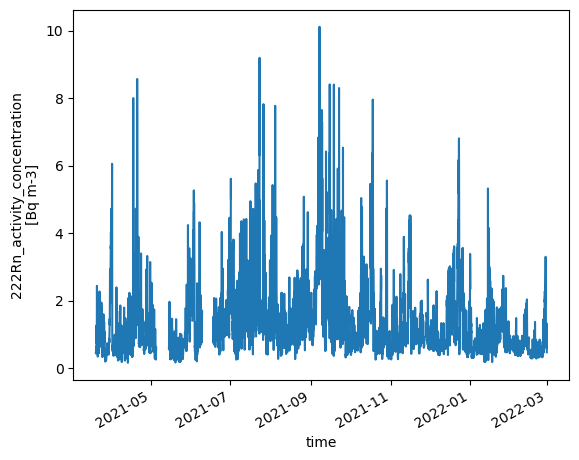

In [6]:
rgl_conc.radon.plot()

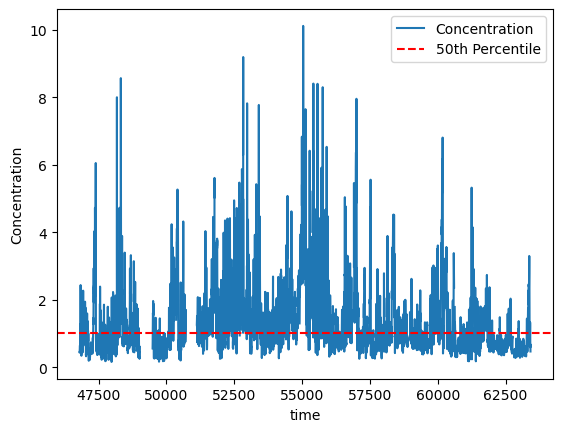

50th Percentile: 1.01


In [30]:
#50th percentile 

concentration_data = rgl_conc.radon

# Calculate the 50th percentile value
percentile_50 = concentration_data.quantile(0.5)

# Plot the concentration data
plt.plot(concentration_data, label='Concentration')

# Plot the 50th percentile as a horizontal line
plt.axhline(y=percentile_50, color='r', linestyle='--', label='50th Percentile')

# Add labels and legend
plt.xlabel('time')
plt.ylabel('Concentration')
plt.legend()

# Show the plot
plt.show()

# Print the 50th percentile value below the graph
print(f'50th Percentile: {percentile_50:.2f}')


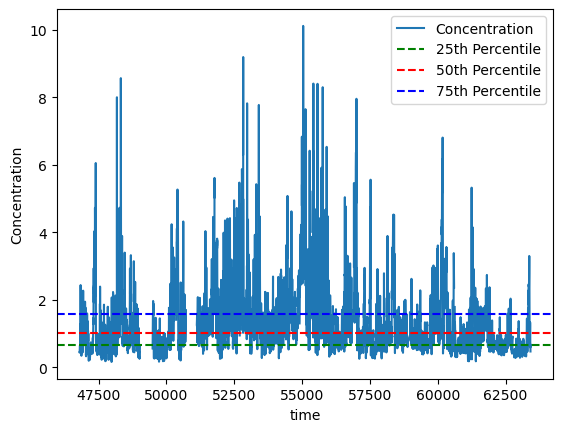

25th Percentile: 0.66
50th Percentile: 1.01
75th Percentile: 1.57


In [31]:
concentration_data = rgl_conc.radon

# Calculate percentiles
percentile_25 = concentration_data.quantile(0.25)
percentile_50 = concentration_data.quantile(0.5)
percentile_75 = concentration_data.quantile(0.75)

# Plot the concentration data
plt.plot(concentration_data, label='Concentration')

# Plot the percentiles as horizontal lines
plt.axhline(y=percentile_25, color='g', linestyle='--', label='25th Percentile')
plt.axhline(y=percentile_50, color='r', linestyle='--', label='50th Percentile')
plt.axhline(y=percentile_75, color='b', linestyle='--', label='75th Percentile')

# Add labels and legend
plt.xlabel('time')
plt.ylabel('Concentration')
plt.legend()

# Show the plot
plt.show()

# Print percentile values below the graph
print(f'25th Percentile: {percentile_25:.2f}')
print(f'50th Percentile: {percentile_50:.2f}')
print(f'75th Percentile: {percentile_75:.2f}')


In [8]:
# TAC data next 

with xr.open_dataset(r'C:\Users\wilse\Documents\Final_project\TAC-ceda-20231103.nc') as f:
    tac_conc = f.load()

In [9]:
tac_conc

<xarray.Dataset>
Dimensions:            (time: 37317)
Coordinates:
  * time               (time) datetime64[ns] 2020-01-13T13:30:00 ... 2022-02-...
Data variables:
    radon              (time) float32 nan nan nan nan ... 3.471 3.2 3.129 3.105
    radon_uncertainty  (time) float32 nan nan nan nan ... 0.2073 0.2113 0.1882
Attributes: (12/14)
    species:              222Rn
    comment:              Measurments from ANSTO 1500 L dual-flow-loop two-fi...
    source:               In situ measurements of air
    station_long_name:    Tacolneston Tower, UK
    station_height_masl:  50.0
    station_latitude:     52.51775
    ...                   ...
    data_owner:           Simon O'Doherty
    data_owner_email:     s.odoherty@bristol.ac.uk
    processed_by:         Angelina Wenger, University of Bristol (angelina.we...
    Conventions:          CF-1.6
    Conditions of use:    Ensure that you contact the data owner at the outse...
    File created:         2023-11-03T12:10:19.378888+00:00

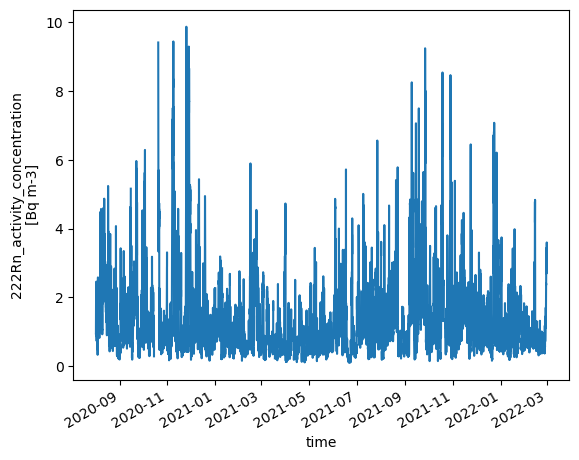

In [10]:
tac_conc.radon.plot()

In [11]:
# WAO 

with xr.open_dataset(r'C:\Users\wilse\Documents\Final_project\WAO-ceda-20231103.nc') as f:
    wao_conc = f.load()

In [12]:
wao_conc

<xarray.Dataset>
Dimensions:            (time: 69229)
Coordinates:
  * time               (time) datetime64[ns] 2018-03-19T17:30:00 ... 2022-02-...
Data variables:
    radon              (time) float32 nan nan nan nan ... 3.483 3.562 3.766
    radon_uncertainty  (time) float32 nan nan nan nan ... 0.1977 0.1899 0.2016
Attributes: (12/14)
    species:              222Rn
    comment:              Measurments from ANSTO 1500 L dual-flow-loop two-fi...
    source:               In situ measurements of air
    station_long_name:    Weybourne Atmospheric Observatory, Uk
    station_height_masl:  0.0
    station_latitude:     0.0
    ...                   ...
    data_owner:           Grant Forster
    data_owner_email:     G.Forster@uea.ac.uk
    processed_by:         Grant Forster, University of East Anglia (G.Forster...
    Conventions:          CF-1.6
    Conditions of use:    Ensure that you contact the data owner at the outse...
    File created:         2023-11-03T12:08:35.862371+00:00

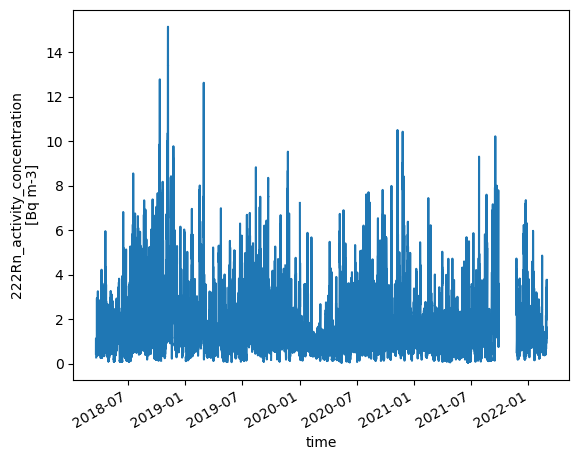

In [13]:
wao_conc.radon.plot()

In [14]:
# HFD 

with xr.open_dataset(r'C:\Users\wilse\Documents\Final_project\HFD-ceda-20231103.nc') as f:
    hfd_conc = f.load()

In [15]:
hfd_conc

<xarray.Dataset>
Dimensions:            (time: 37601)
Coordinates:
  * time               (time) datetime64[ns] 2020-01-07T15:30:00 ... 2022-02-...
Data variables:
    radon              (time) float32 nan nan nan nan ... 2.658 1.784 0.6503
    radon_uncertainty  (time) float32 nan nan nan nan ... 0.0796 0.0637 0.0275
Attributes: (12/14)
    species:              222Rn
    comment:              Measurments from ANSTO 1500 L dual-flow-loop two-fi...
    source:               In situ measurements of air
    station_long_name:    Heathfield, Uk
    station_height_masl:  150.0
    station_latitude:     50.97675
    ...                   ...
    data_owner:           Tim Arnold
    data_owner_email:     tim.arnold@npl.co.uk
    processed_by:         Edward Chung, National Physical Laboratory (edward....
    Conventions:          CF-1.6
    Conditions of use:    Ensure that you contact the data owner at the outse...
    File created:         2023-11-03T12:05:22.983732+00:00

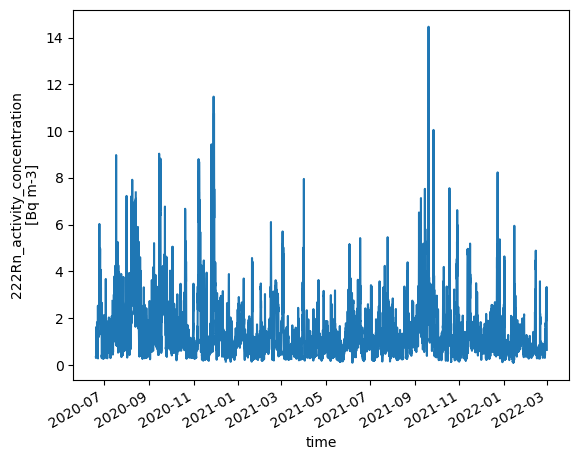

In [16]:
hfd_conc.radon.plot()